In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import (precision_score,
                             recall_score, f1_score, roc_auc_score,
                             precision_recall_curve, roc_curve,
                             auc)

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('twitter_data.csv')

In [ ]:
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [ ]:
df = df.rename(columns = {'tweet': 'text', 'intention': 'target'})

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.head()

,text,target
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


([<matplotlib.patches.Wedge at 0x7d01a4e58490>,
 [Text(-0.21146247945214253, 1.0794830335785515, '1'),
  Text(0.21146258052063738, -1.0794830137800007, '0')])

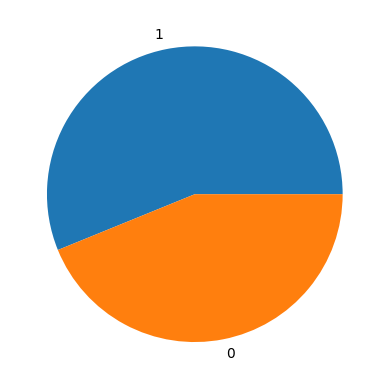

In [ ]:
plt.pie(df['target'].value_counts(), labels = df['target'].unique())

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'@\w+\s?', '', text)
  text = re.sub(r'#\w+\s?', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)

  return text

df['text'] = df['text'].apply(clean_text)
df.head()

,text,target
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the of october i overdosed...,1
4,i feel like no one cares i just want to die ma...,1


In [ ]:
def normalize_text(text):
  text = word_tokenize(text)
  wnl = WordNetLemmatizer()
  text = [wnl.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]

  text = " ".join(text)
  return text


df['text'] = df['text'].apply(normalize_text)
df['tokens'] = df['text'].apply(lambda x: x.split())
df.head()

,text,target,tokens
0,life meaningless want end life badly life comp...,1,"[life, meaningless, want, end, life, badly, li..."
1,muttering wan na die daily month feel worthles...,1,"[muttering, wan, na, die, daily, month, feel, ..."
2,work slave really feel like purpose life make ...,1,"[work, slave, really, feel, like, purpose, lif..."
3,something october overdosed felt alone horribl...,1,"[something, october, overdosed, felt, alone, h..."
4,feel like one care want die maybe feel le lonely,1,"[feel, like, one, care, want, die, maybe, feel..."


In [ ]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [ ]:
model = LogisticRegression()
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)
y_pred_proba = model.predict_proba(X_test_bow)[:,1]

Значение метрик на тестовой выборке:

In [ ]:
precision_lr = precision_score(y_test, y_pred)
precision_lr

0.9338842975206612

In [ ]:
recall_lr = recall_score(y_test, y_pred)
recall_lr

0.849624060150376

In [ ]:
f1_lr = f1_score(y_test, y_pred)
f1_lr

0.889763779527559

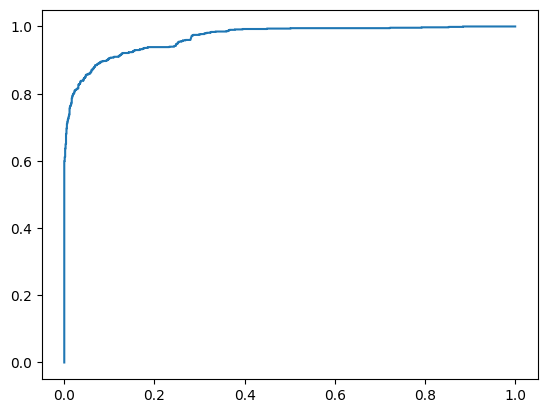

In [ ]:
FPR, TPR, _ = roc_curve(y_test, y_pred_proba)
plt.plot(FPR, TPR)

In [ ]:
roc_auc_lr = roc_auc_score(y_test, y_pred_proba)
roc_auc_lr

0.9674454166605597

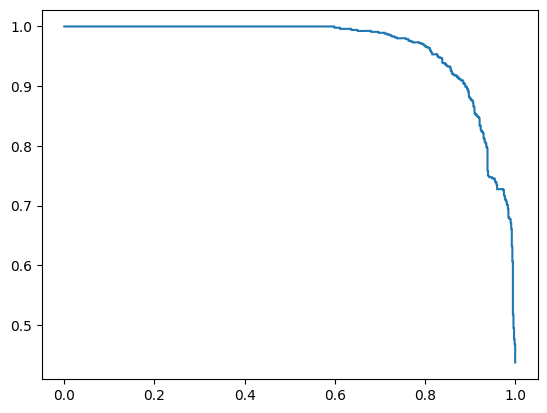

In [ ]:
pr, rec, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(rec, pr)

In [ ]:
pr_auc_lr = auc(rec, pr)
pr_auc_lr

0.9660060072395183